**Di Luo**

Spring 2020

CS 251: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import pca_cov
from pca_cov import PCA_COV

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Notes

In your implementations, only the following "high level" `scipy`/`numpy` functions can be used:

- `np.linalg.eig`

**NOTE:** The numpy functions that you have been using so far are fine to use.

## Task 1: Principal component analysis using the covariance matrix

In this task, you will implement principal component analysis (PCA) using the covariance matrix method, test your code, plot the results on the Iris dataset, then run PCA and analyze on several other datasets

### 1a) Import Iris data

- In the below cell, load in the Iris dataset into a pandas DataFrame (note, this version of iris does not have the data type row — going forward, csv files we work with won't have this `type` row).
- Print out the head (only showing the first 5 data samples).
- Create an `PCA` object called `pca` based on the DataFrame object that you just created.

In [2]:
iris_data = pd.read_csv('data/iris.csv')
print(iris_data.head(5))
# print()
# print(iris_data)
pca = PCA_COV(iris_data)

   sepalLength  sepalWidth  petalLength  petalWidth  species
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0


Your code should print something that looks like this (with fancier formatting):

    sepalLength	sepalWidth	petalLength	petalWidth	species
    0	5.1	3.5	1.4	0.2	0
    1	4.9	3.0	1.4	0.2	0
    2	4.7	3.2	1.3	0.2	0
    3	4.6	3.1	1.5	0.2	0
    4	5.0	3.6	1.4	0.2	0


### 1b) Implement PCA

Implement and test the following methods necessary to perform PCA in `pca_cov.py`.

- `covariance_matrix`: Computes the covariance matrix of data
- `compute_prop_var`: Computes the proportion variance accounted for by the principal components (PCs).
- `compute_cum_var`: Computes the *cumulative* proportion variance accounted for by the PCs.
- `pca`: Method to perform PCA on the data
- `elbow_plot` (**answer Question 1**)
- `pca_project`: Project the data into PCA space

#### (i) Test `covariance_matrix`

In [3]:
# Test covariance here
np.random.seed(0)
d = np.random.randn(100, 3)
cov_mat = pca.covariance_matrix(d)
print(f'Your covariance matrix has shape {cov_mat.shape} and should be (3, 3)')
print(f'Your covariance matrix is:\n{cov_mat} and should be\n[[ 1.06338 -0.07562  0.11267]\n [-0.07562  0.97412 -0.0222 ]\n [ 0.11267 -0.0222   0.96217]]')

Your covariance matrix has shape (3, 3) and should be (3, 3)
Your covariance matrix is:
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]] and should be
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]]


#### (ii) Tes `prop_var`

Takes eigenvalues ordered large-to-small and computes the proportion of the total variance account for by the $k^{th}$ principal component.

In [4]:
# Test prop_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
print(f'Your list is actually a Python list (as it should be)? {isinstance(prop_var, list)}')
print(f'Your proportion variance list length is {len(prop_var)} and should be 10')
print(f'Your proportion variance list begins with\n{prop_var[:2]} and it should be\n[0.15649813681155653, 0.1448232917174111]')

Your list is actually a Python list (as it should be)? True
Your proportion variance list length is 10 and should be 10
Your proportion variance list begins with
[0.15649813681155653, 0.1448232917174111] and it should be
[0.15649813681155653, 0.1448232917174111]


#### (iii) Test `compute_cum_var`

Takes proportion variance for principal components, ordered large-to-small, and computes the cumulative sum (cumulative variance accounted for by the first $k$ principal components).

In [5]:
# Test accum_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
accum_var = pca.compute_cum_var(prop_var)
print(f'Your list is actually a Python list (as it should be)? {isinstance(accum_var, list)}')
print(f'Your cumulative variance list length is {len(accum_var)} and should be 10')
print(f'Your cumulative variance list begins with\n{accum_var[:2]} and should be\n[0.15649813681155653, 0.3013214285289676]')

Your list is actually a Python list (as it should be)? True
Your cumulative variance list length is 10 and should be 10
Your cumulative variance list begins with
[0.15649813681155653, 0.3013214285289676] and should be
[0.15649813681155653, 0.3013214285289676]


#### (iv) Test `pca`

Performs PCA using the covariance matrix method.

In [6]:
# Test pca (no normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print()

# Test values
print(f"Your vars in Iris PCA:\n{pca.vars}  and they should be\n['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']")
print(f'Your eigenvectors:\n{pca.e_vecs}. They should be\n[[ 0.36139 -0.65659 -0.58203  0.31549]\n [-0.08452 -0.73016  0.59791 -0.31972].\n [ 0.85667  0.17337  0.07624 -0.47984]\n[ 0.35829  0.07548  0.54583  0.75366]].')
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[4.22824 0.24267 0.07821 0.02384]')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.924618723201727, 0.9776852063187949, 0.9947878161267245, 0.9999999999999999] .')



There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.

Your vars in Iris PCA:
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']  and they should be
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
Your eigenvectors:
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972]
 [ 0.85667  0.17337  0.07624 -0.47984]
 [ 0.35829  0.07548  0.54583  0.75366]]. They should be
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972].
 [ 0.85667  0.17337  0.07624 -0.47984]
[ 0.35829  0.07548  0.54583  0.75366]].
Your eigenvalues:
[4.22824 0.24267 0.07821 0.02384]. They should be
[4.22824 0.24267 0.07821 0.02384]
Cumulative proportion variance account for:
[0.924618723201

In [7]:
# Test pca (normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers, normalize=True)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print(f'Data min/max is {pca.A.min()}/{pca.A.max()} should be 0.0/1.0')
print()

# Some test values
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[0.23245 0.03247 0.0096  0.00176].')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].')

There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.
Data min/max is 0.0/1.0 should be 0.0/1.0

Your eigenvalues:
[0.23245 0.03247 0.0096  0.00176]. They should be
[0.23245 0.03247 0.0096  0.00176].
Cumulative proportion variance account for:
[0.8413603821315428, 0.9588784639918413, 0.993614078079774, 0.9999999999999999]. It should be
[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].


#### (v) Test `elbow_plot`

Visualize the cumulative proportion variance accounted for by the first $k$ principal components.

**Make sure that you have the normalized PCA in memory before proceeding (the last cell of test code above)**

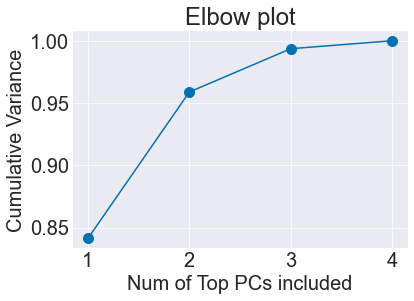

In [8]:
# test elbow plot
pca.elbow_plot()
plt.show()

**Question 1:** Based on the Iris elbow plot, how many principle components would you drop. Why?

**Question 1 answer:** I would like to drop 2 since the top 2 PCs already acount for over 95% of cumulative variance. 

#### (vi) Test `pca_project`

Project the data onto a list of the top $2$ principal components (`pcs_to_keep = [0, 1]`)

In [9]:
pca_proj01 = pca.pca_project([0, 1])

##### Plot your PCA projected Iris data

- In the cell below, create a scatterplot of your PCA projected data.
- Label the x and y axes appropriately.

If everything goes well, you should see two distinct clusters

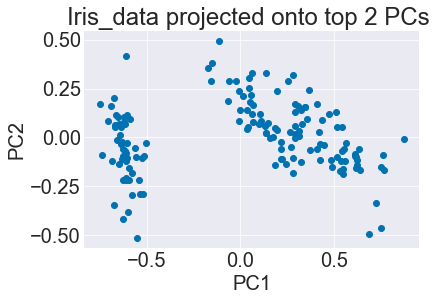

In [10]:
plt.scatter(pca_proj01[:,0], pca_proj01[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Iris_data projected onto top 2 PCs ')
plt.show()

### 1c) Dropping different pairs of principal components

- In the cell below, create a "high quality" 2x2 subplots grid of scatterplots that drops different consective PCs from the data, then project onto the remaining PCs.

The 2x2 plots should keep:
- (top-left) PCs [2, 3]
- (top-right) PCs [1, 2]
- (bottom-left) PCs [3, 0]
- (bottom-right) PCs [0, 1]

High quality means
- x and y axis label indicating the PC (e.g. PC0)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legiable.

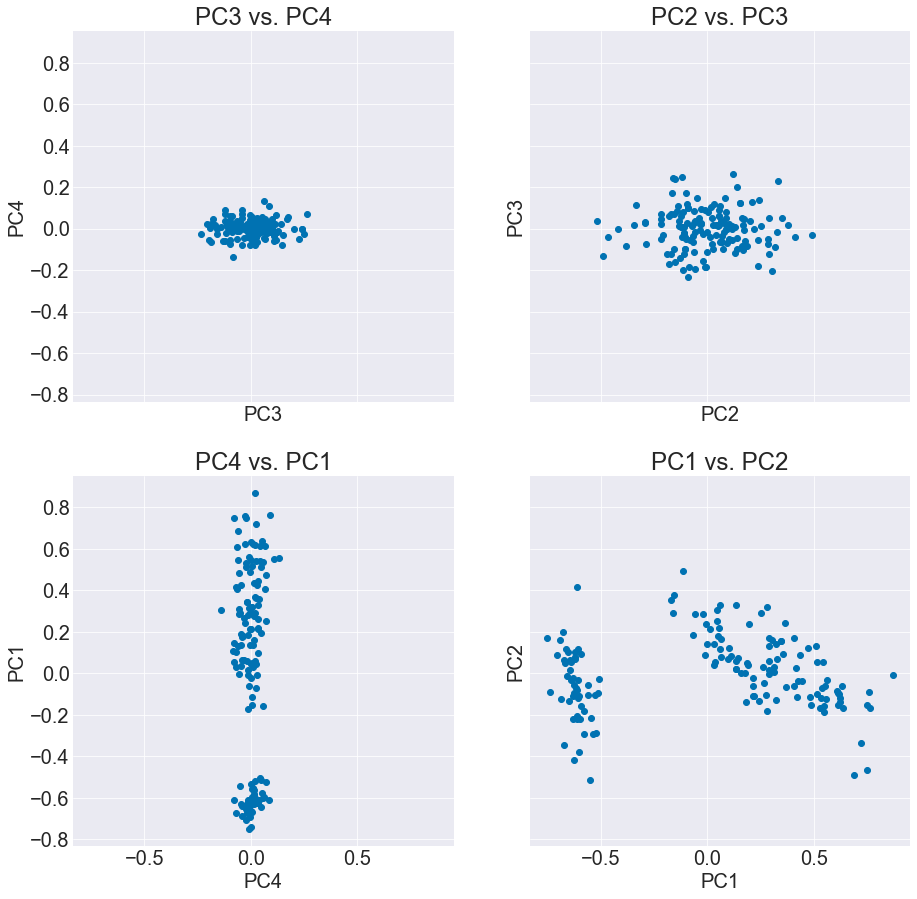

In [11]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(15,15))

pc34 = pca.pca_project([2,3])

pc23 = pca.pca_project([1,2])

pc41 = pca.pca_project([3,0])

pc12 = pca.pca_project([0,1])

ax[0,0].scatter(pc34[:,0], pc34[:,1])
ax[0,0].set_title('PC3 vs. PC4')
ax[0,0].set_xlabel('PC3')
ax[0,0].set_ylabel('PC4')

ax[0,1].scatter(pc23[:,0], pc23[:,1])
ax[0,1].set_title('PC2 vs. PC3')
ax[0,1].set_xlabel('PC2')
ax[0,1].set_ylabel('PC3')

ax[1,0].scatter(pc41[:,0], pc41[:,1])
ax[1,0].set_title('PC4 vs. PC1')
ax[1,0].set_xlabel('PC4')
ax[1,0].set_ylabel('PC1')

ax[1,1].scatter(pc12[:,0], pc12[:,1])
ax[1,1].set_title('PC1 vs. PC2')
ax[1,1].set_xlabel('PC1')
ax[1,1].set_ylabel('PC2')

plt.show()

**Question 2:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.

**Question 2 answer:** Keeping PCs with lower indices (has higher eigenvalues) shows a shape that is more similar to the original one. Keeping PCs with higher indices shows a more random or unrelated shape.

### 1d) Loading plot (or heatmap for sections A/C)

Visualize how the top two principal components relate to original data variables.

- Implement `loading_plot` (or heatmap for sections A/C) in `pca_cov.py`

#### Test `loading_plot` (or heatmap for sections A/C)

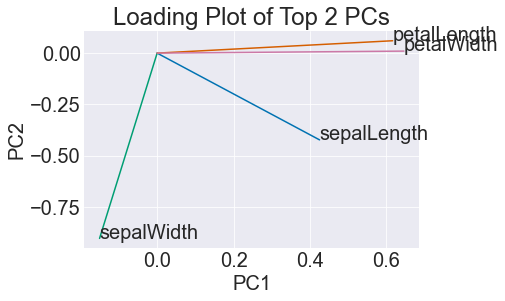

In [12]:
pca.loading_plot()
plt.show()

**Question 3:** What do the loadings (or heatmap for sections A/C) tell us what the first two PCs measure, with respect to the original data axes?

**Question 3 answer:** PC1 measures petalLength and petalWidth because PC1 is positively correlated with these two. PC2 measures sepalWidth because it is negatively correlated to sepalWidth. PC1 and PC2 work together to measure sepalLength.

**Question 4:** What do the loadings (or heatmap for sections A/C) tell us about correlations among the original data axes?

**Question 4 answer:** petalLength is positively correlated with petalWidth, and they are not related to sepalWidth. sepalLength is correlated with both groups.

### 1e) Reconstruct data based on PCs

- In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space.
- In the cell below, create a scatter plot of the two data variables 'sepalLength', 'sepalWidth' of the Iris data **normalized separately**.
- In the 2nd cell below, do PCA on the normalized Iris data and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables ('sepalLength', 'sepalWidth' — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.

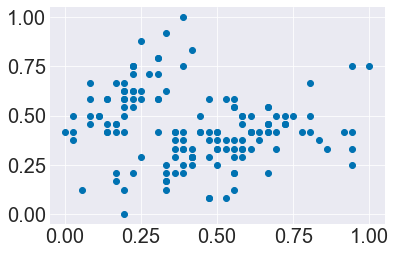

In [13]:
# Plot original iris data normalized
iris2 = iris_data[['sepalLength', 'sepalWidth']]

data = iris2.to_numpy()

data_norm = (data - np.min(data, axis=0)) / data.ptp(axis=0)

# Plot
plt.scatter(data_norm[:,0], data_norm[:,1])

plt.show()

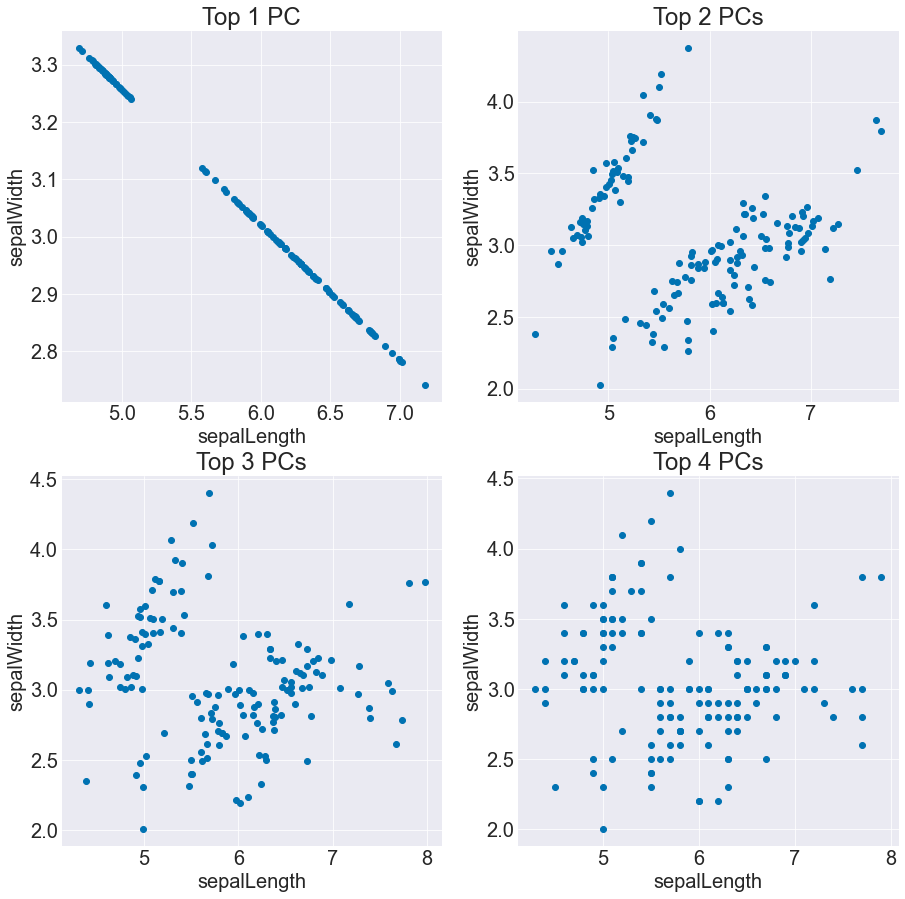

In [14]:
# 2x2 grid of scatter plots
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers, normalize=True)

pc1 = pca.pca_then_project_back(1)
pc2 = pca.pca_then_project_back(2)
pc3 = pca.pca_then_project_back(3)
pc4 = pca.pca_then_project_back(4)

fig, ax = plt.subplots(2,2,figsize=(15,15))

ax[0,0].scatter(pc1[:,0], pc1[:,1])
ax[0,0].set_title('Top 1 PC')
ax[0,0].set_xlabel('sepalLength')
ax[0,0].set_ylabel('sepalWidth')

ax[0,1].scatter(pc2[:,0], pc2[:,1])
ax[0,1].set_title('Top 2 PCs')
ax[0,1].set_xlabel('sepalLength')
ax[0,1].set_ylabel('sepalWidth')

ax[1,0].scatter(pc3[:,0], pc3[:,1])
ax[1,0].set_title('Top 3 PCs')
ax[1,0].set_xlabel('sepalLength')
ax[1,0].set_ylabel('sepalWidth')

ax[1,1].scatter(pc4[:,0], pc4[:,1])
ax[1,1].set_title('Top 4 PCs')
ax[1,1].set_xlabel('sepalLength')
ax[1,1].set_ylabel('sepalWidth')

plt.show()

**Question 5:** How well does each of the re-projections compress the original data? Briefly interpret what the above 2x2 grid means.

**Question 5 answer:** Top 1 PC compresses the data into one PC, which resembles a line showing the negatively proportional relationship between two variables. Top 2 PCs do a good job simplifying the data into two PCs, which shows the key relationship in data by ignoring unimportant PCs. As num of Top PC increases, more PCs are added and the shape become more similar to the original data until totally the same.

## Task 2: PCA on Australia dataset and one other dataset

Do PCA on:
- the Australia dataset
- one other dataet of your choice

In the cells below, include at minimum

- Elbow plot of cumulative variance accounted for by first $k$ principal components.
- Written description of your choice of number of PCs preserved and why.
- Visualization (plot) of PCA projected data on 1st two PCs.
- Loading plot (or heatmap for sections A/C) of the 1st two PCs. Interpret the meaning of each vector.

### 2a) Australia dataset PCA

Do a PCA (**with data normalization**), but include only the following variables in the data matrix:

    premin, premax, salmin, salmax, minairtemp, maxairtemp, minsst, maxsst, minsoilmoist, maxsoilmoist, and runoffnew

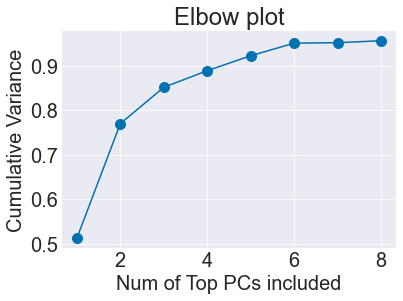

In [23]:
aus_data = pd.read_csv("data/AustraliaCoast.csv")
aus_pca = PCA_COV(aus_data)

vars = ['premin', 'premax', 'salmin', 'salmax', 'minairtemp', 'maxairtemp', 'minsst', 'maxsst', 'minsoilmoist', 'maxsoilmoist', 'runoffnew']
aus_pca.pca(vars, normalize=True)

# elbow plot
aus_pca.elbow_plot(8)

I decide to preserve top 3 PC as the first 3 PCs accounts for more than 90% the cumulative variance.

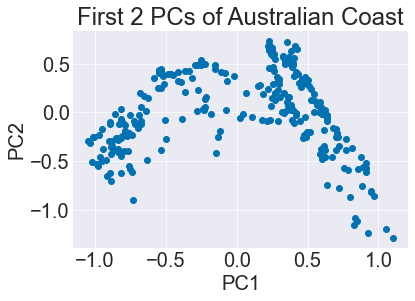

In [43]:
# Visualization (plot) of PCA projected data on 1st two PCs.
aus_pc2 = aus_pca.pca_project([0,1])

plt.scatter(aus_pc2[:,0], aus_pc2[:,1])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First 2 PCs of Australian Coast')

plt.show()


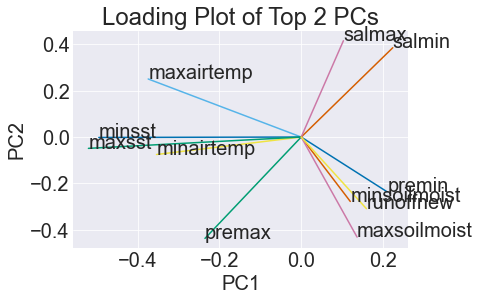

In [44]:
# Loading plot (or heatmap for sections A/C) of the 1st two PCs
aus_pca.loading_plot()
plt.show()

Interpret the meaning of each vector: PC1 measures sal, soilmoist, and pre; PC2 measures airtemp and sst.

salmax and salmin are positively correlated.

max and min soilmoist are positively correlated.

These two groups are negatively correlated.


max and min sst and airtemp are positively correlated.

### 2b) Other dataset PCA

**Make sure you describe what the dataset is, what variables are, where you got it.**

Include at minimum below:

- Elbow plot of cumulative variance accounted for by first $k$ principal components.
- Written description of your choice of number of PCs preserved and why.
- Visualization (plot) of PCA projected data on 1st two PCs.
- Loading plot (or heatmap for sections A/C) of the 1st two PCs. Interpret the meaning of each vector.

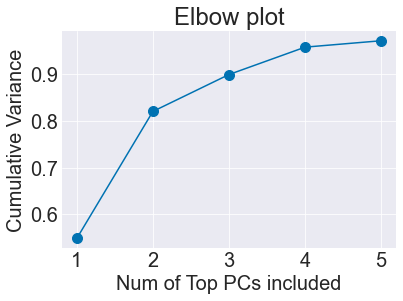

In [48]:
# Other dataset
# The dataset is from data.world, which describes the nutrient of different food
# The variables I choose are Energy_kcal, Protein_g, Fat_g, Carb_g, Sugar_g, Fiber_g, VitA_mcg, VitB6_mg, VitB12_mcg, VitC_mg, VitE_mg
nutr_data = pd.read_csv('https://query.data.world/s/m6ifncjtf6ycdujh7k6rufl5yu6yhy')
nutr_pca = PCA_COV(nutr_data)
nutr_vars = ['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg']

nutr_pca.pca(nutr_vars, True)

# elbow plot
nutr_pca.elbow_plot(5)


I decide to preserve top 3 PC as the first 3 PCs accounts for around 90% of the cumulative variance.

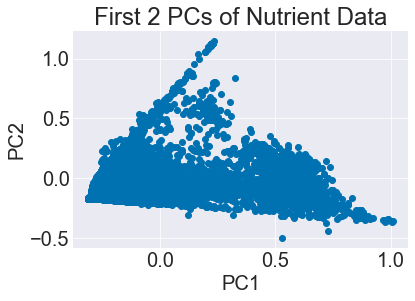

In [49]:
# Visualization (plot) of PCA projected data on 1st two PCs.
nutr_pc2 = nutr_pca.pca_project([0,1])

plt.scatter(nutr_pc2[:,0], nutr_pc2[:,1])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First 2 PCs of Nutrient Data')

plt.show()

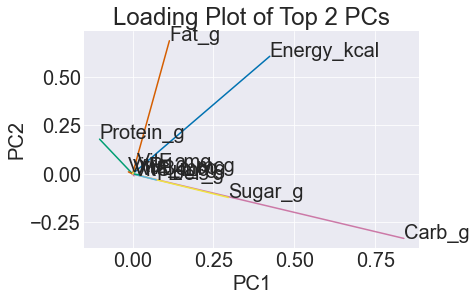

In [51]:
# Loading plot (or heatmap for sections A/C) of the 1st two PCs
nutr_pca.loading_plot()
plt.show()

Interpret the meaning of each vector: PC1 measures sugar and carb since they are positively proportional to PC1; PC2 measures fat and energy since they are positively proportional to PC2.

Fat and energy are positively correlated.

Sugar and carb are positively correlated.